## Read dynamic prompt results

In [2]:
import pickle
import os
import glob

# Get all files in the directory
files = glob.glob('extension_plots/best_values_tracking_v*.pickle')
# Sort files by modification time
files.sort(key=os.path.getmtime, reverse=True)
# Load the most recent file
if files:
    latest_file = files[0]
    with open(latest_file, 'rb') as f:
        best_values = pickle.load(f)
    print(f"Loaded best_values from {latest_file}")
else:
    print("No best_values files found in the directory.")

print(f"Loaded {len(best_values)} best_values entries.")

Loaded best_values from extension_plots/best_values_tracking_v20250617_101115.pickle
Loaded 4 best_values entries.


In [3]:
best_values

{0: {'best_score': 0.92289308661674,
  'best_template': 'Fundus image reveals',
  'best_description_set': {'No retinopathy': 'Normal retina',
   'Retinopathy': 'Diabetic retinopathy'}},
 1: {'best_score': 0.9172209168297761,
  'best_template': 'Fundus image reveals',
  'best_description_set': {'No retinopathy': 'Normal retina',
   'Retinopathy': 'Diabetic retinopathy'}},
 2: {'best_score': 0.9177703407599942,
  'best_template': 'Fundus image reveals',
  'best_description_set': {'No retinopathy': 'Normal retina',
   'Retinopathy': 'Diabetic retinopathy'}},
 'ape_tracking': {'evolution_history': [{'iteration': 0,
    'template': '',
    'descriptions': {'No retinopathy': 'healthy', 'Retinopathy': 'diseased'},
    'f1': 0.6145332420638315,
    'improvement': 0.0,
    'is_best': True,
    'timestamp': 4.5299530029296875e-06},
   {'iteration': 1,
    'template': 'Fundus image reveals',
    'descriptions': {'No retinopathy': 'Normal retina structure',
     'Retinopathy': 'Diabetic retinopath

🎨 Creating final extension plots for journal submission...


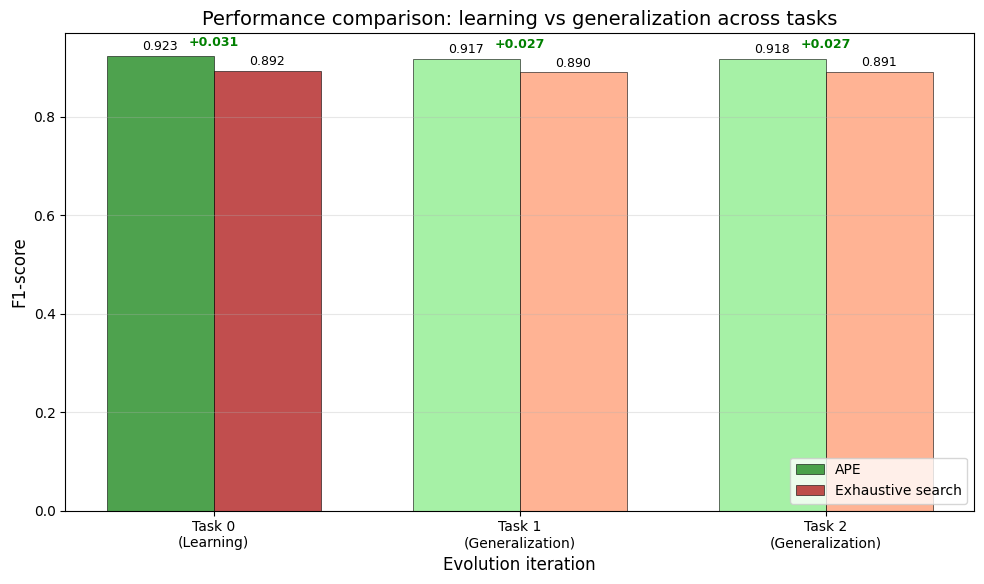

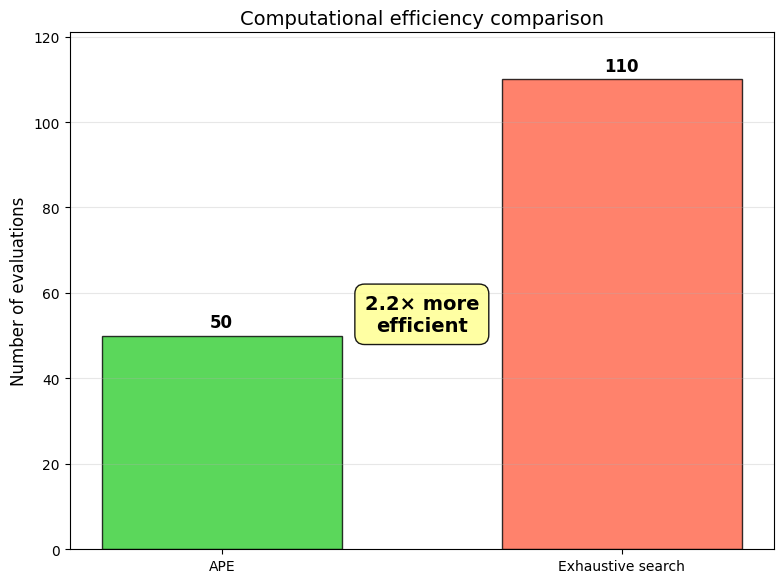

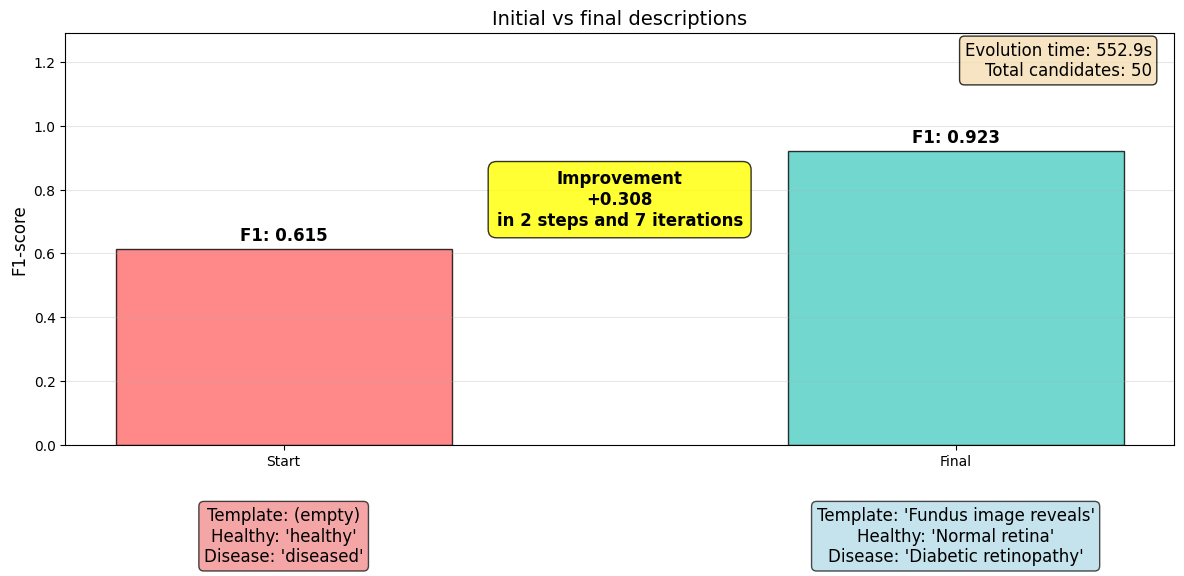

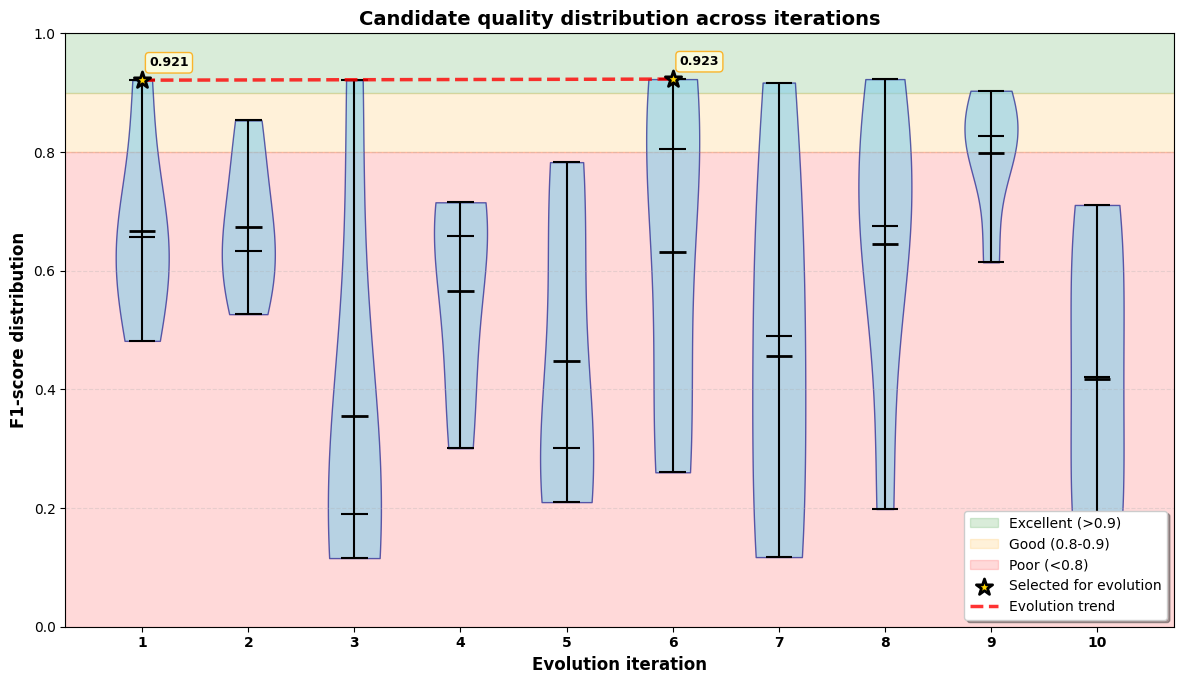

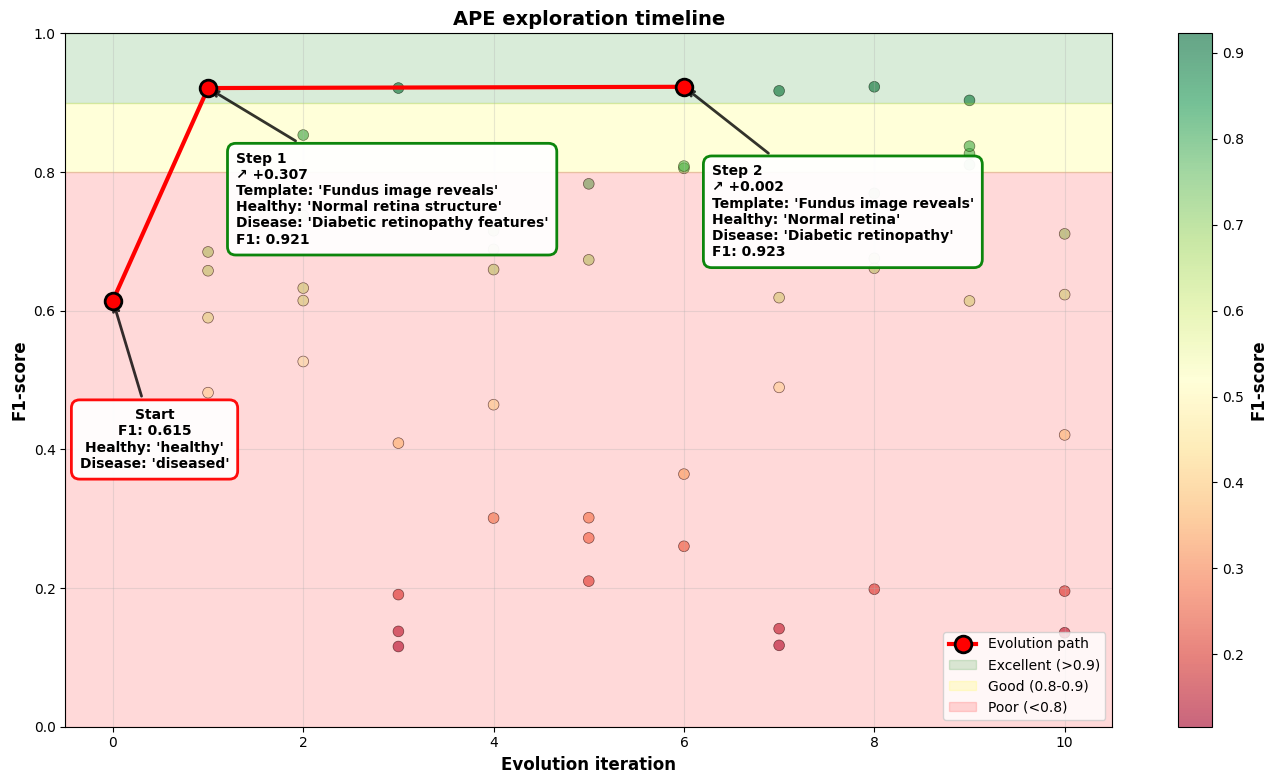

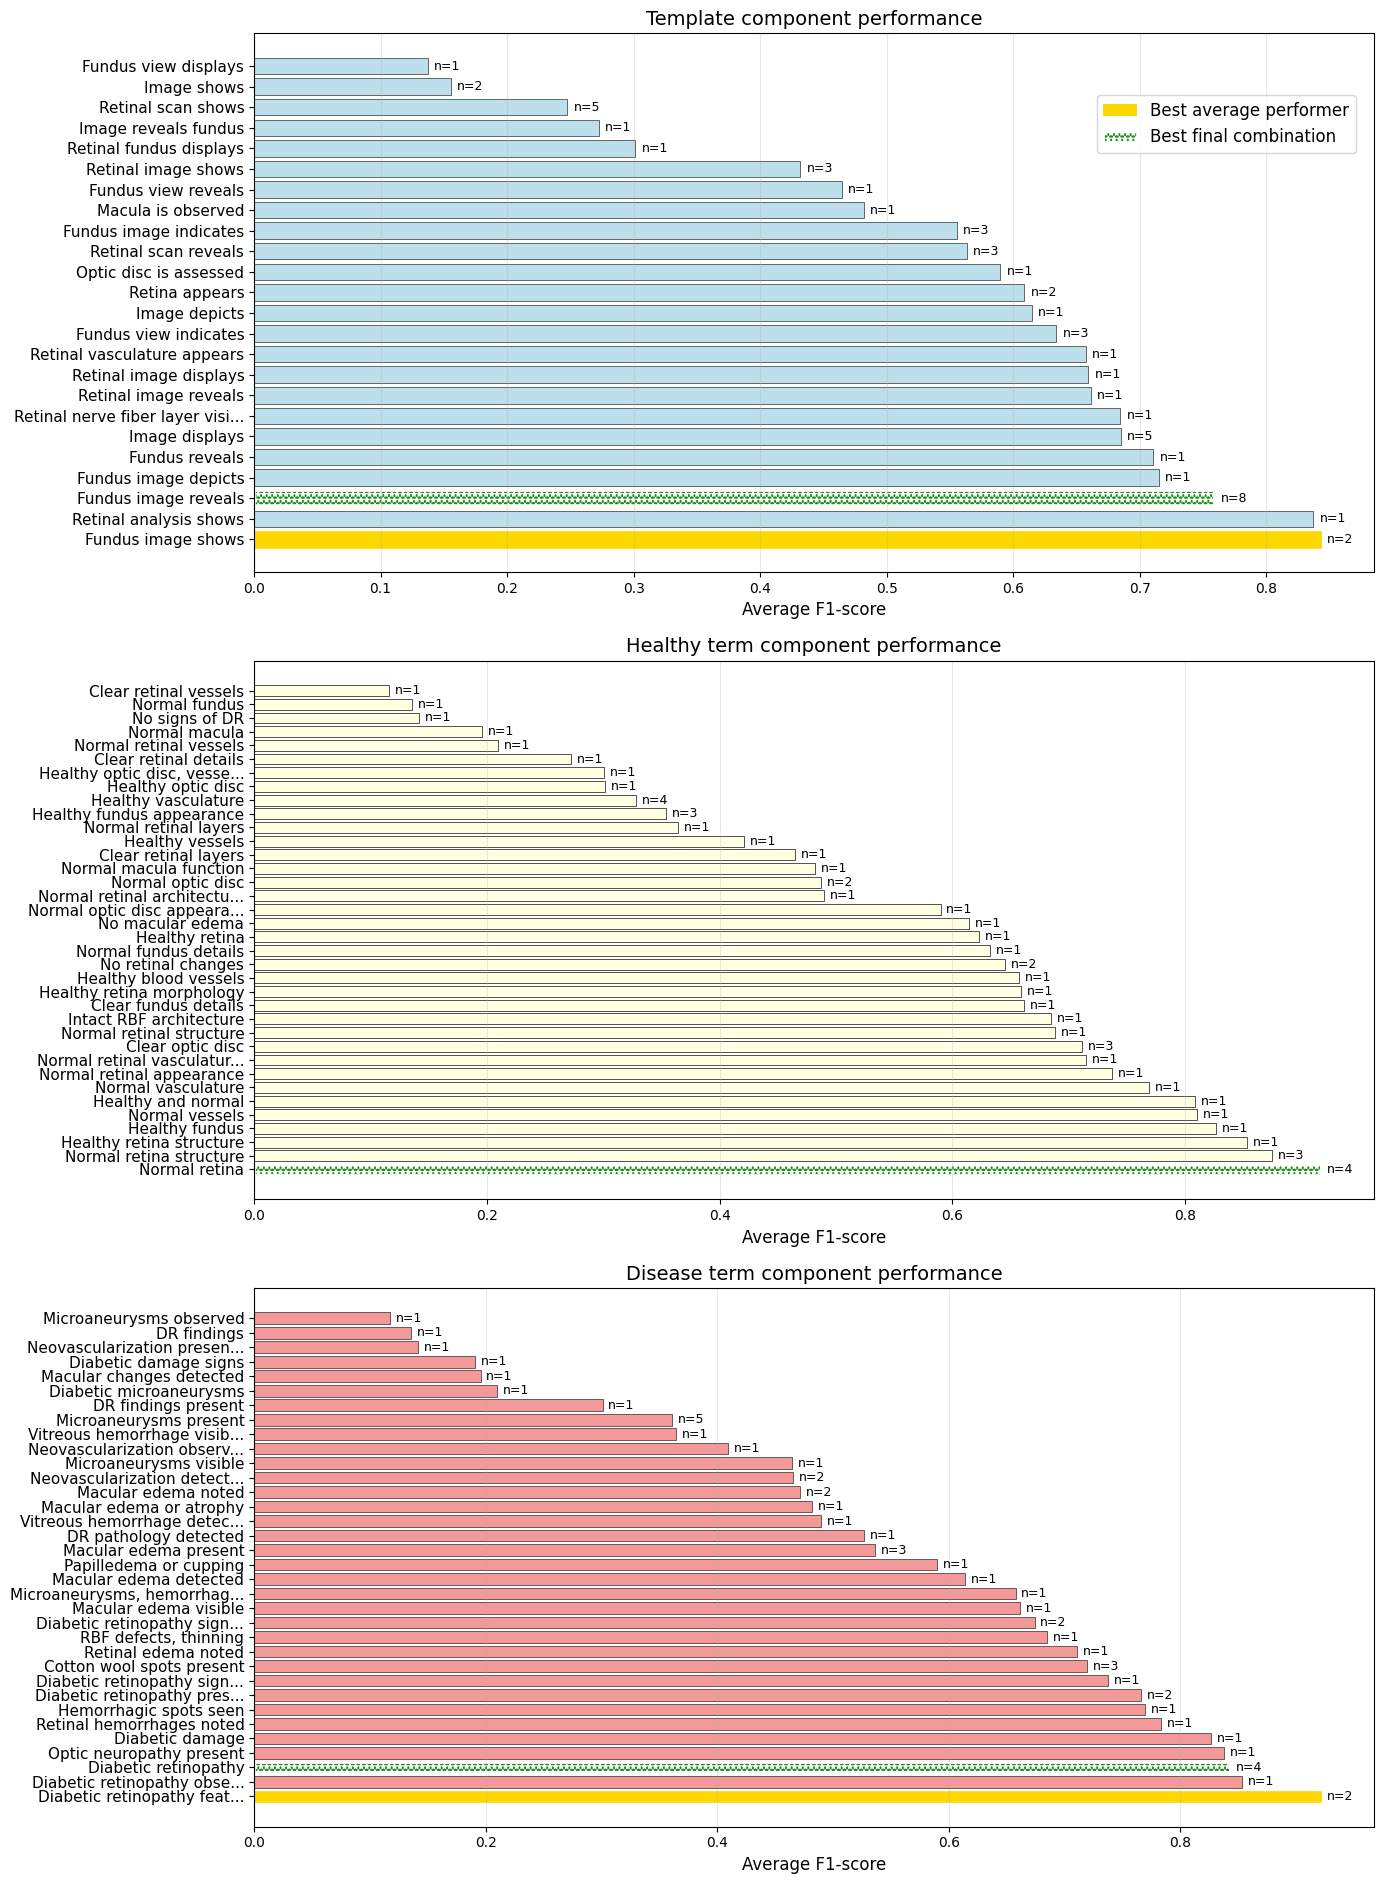

✅ All final extension plots created!
📁 Plots saved in: ./extension_plots/

Plot summary:
  1. performance_analysis.pdf - Learning vs transfer across tasks
  2. computational_efficiency.pdf - Efficiency comparison
  3. learning_progression.pdf - Start vs final stages evolution
  4. candidate_quality_distribution.pdf - Solution space exploration
  5. search_space_exploration.pdf - Novel prompt landscape navigation
  6. prompt_component_analysis.pdf - Breakdown of prompt components


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create plots directory
os.makedirs('extension_plots', exist_ok=True)

# Set journal-quality style parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})


def plot_prompt_component_analysis(best_values):
    """
    Plot 6: UNIQUE - Prompt component contribution analysis
    Novel visualization showing how different prompt components contribute to performance
    """
    if 'ape_tracking' not in best_values:
        print("❌ No tracking data available for prompt component analysis")
        return
    tracking_data = best_values['ape_tracking']
    all_candidates = tracking_data['all_candidates']
    if not all_candidates:
        print("❌ No candidate data available")
        return
    
    # Get the best final combination from the data
    best_template = None
    best_healthy = None
    best_disease = None
    
    # Find the best combination from tasks 0, 1, 2
    for task in [0, 1, 2]:
        if task in best_values:
            best_template = best_values[task]['best_template']
            best_healthy = best_values[task]['best_description_set']['No retinopathy']
            best_disease = best_values[task]['best_description_set']['Retinopathy']
            break
    
    # Analyze component contributions
    template_performance = {}
    healthy_term_performance = {}
    disease_term_performance = {}
    for candidate in all_candidates:
        template = candidate['template'] if candidate['template'] else '(empty)'
        healthy = candidate['descriptions']['No retinopathy']
        disease = candidate['descriptions']['Retinopathy']
        f1 = candidate['f1']
        # Track performance by component
        if template not in template_performance:
            template_performance[template] = []
        template_performance[template].append(f1)
        if healthy not in healthy_term_performance:
            healthy_term_performance[healthy] = []
        healthy_term_performance[healthy].append(f1)
        if disease not in disease_term_performance:
            disease_term_performance[disease] = []
        disease_term_performance[disease].append(f1)
    
    # Calculate average performance for each component
    template_avg = {k: np.mean(v) for k, v in template_performance.items()}
    healthy_avg = {k: np.mean(v) for k, v in healthy_term_performance.items()}
    disease_avg = {k: np.mean(v) for k, v in disease_term_performance.items()}
    
    # Create figure with subplots - INCREASED HEIGHT for more space
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 19))
    
    # Plot 1: Template performance
    templates = list(template_avg.keys())
    template_scores = list(template_avg.values())
    template_counts = [len(template_performance[t]) for t in templates]
    # Sort by performance
    sorted_templates = sorted(zip(templates, template_scores, template_counts), 
                             key=lambda x: x[1], reverse=True)
    templates, template_scores, template_counts = zip(*sorted_templates)
    
    bars1 = ax1.barh(range(len(templates)), template_scores, 
                     height=0.8,
                     color='lightblue', alpha=0.8, edgecolor='black', linewidth=0.5)
    # Add count labels
    for i, (score, count) in enumerate(zip(template_scores, template_counts)):
        ax1.text(score + 0.005, i, f'n={count}', va='center', fontsize=9)
    ax1.set_yticks(range(len(templates)))
    ax1.set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in templates], 
                        fontsize=11)
    ax1.set_xlabel('Average F1-score')
    ax1.set_title('Template component performance')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Plot 2: Healthy term performance
    healthy_terms = list(healthy_avg.keys())
    healthy_scores = list(healthy_avg.values())
    healthy_counts = [len(healthy_term_performance[h]) for h in healthy_terms]
    # Sort by performance
    sorted_healthy = sorted(zip(healthy_terms, healthy_scores, healthy_counts), 
                           key=lambda x: x[1], reverse=True)
    healthy_terms, healthy_scores, healthy_counts = zip(*sorted_healthy)
    
    bars2 = ax2.barh(range(len(healthy_terms)), healthy_scores, 
                     height=0.8,
                     color='lightyellow', alpha=0.95, edgecolor='black', linewidth=0.5)
    # Add count labels
    for i, (score, count) in enumerate(zip(healthy_scores, healthy_counts)):
        ax2.text(score + 0.005, i, f'n={count}', va='center', fontsize=9)
    ax2.set_yticks(range(len(healthy_terms)))
    ax2.set_yticklabels([h[:25] + '...' if len(h) > 25 else h for h in healthy_terms], 
                        fontsize=11)
    ax2.set_xlabel('Average F1-score')
    ax2.set_title('Healthy term component performance')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Plot 3: Disease term performance
    disease_terms = list(disease_avg.keys())
    disease_scores = list(disease_avg.values())
    disease_counts = [len(disease_term_performance[d]) for d in disease_terms]
    # Sort by performance
    sorted_disease = sorted(zip(disease_terms, disease_scores, disease_counts), 
                           key=lambda x: x[1], reverse=True)
    disease_terms, disease_scores, disease_counts = zip(*sorted_disease)
    
    bars3 = ax3.barh(range(len(disease_terms)), disease_scores, 
                     height=0.8,
                     color='lightcoral', alpha=0.8, edgecolor='black', linewidth=0.5)
    # Add count labels
    for i, (score, count) in enumerate(zip(disease_scores, disease_counts)):
        ax3.text(score + 0.005, i, f'n={count}', va='center', fontsize=9)
    ax3.set_yticks(range(len(disease_terms)))
    ax3.set_yticklabels([d[:25] + '...' if len(d) > 25 else d for d in disease_terms], 
                        fontsize=11)
    ax3.set_xlabel('Average F1-score')
    ax3.set_title('Disease term component performance')
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Highlight best average performers (gold) and best final combination (green with stars)
    datasets = [
        (ax1, bars1, templates, best_template),
        (ax2, bars2, healthy_terms, best_healthy), 
        (ax3, bars3, disease_terms, best_disease)
    ]
    
    for ax, bars, terms, best_final in datasets:
        if bars:
            # Gold for best average performer
            bars[0].set_color('#FFD700')
            bars[0].set_alpha(1.0)
            
            # Green with star pattern for best final combination
            if best_final and best_final in terms:
                best_final_idx = terms.index(best_final)
                bars[best_final_idx].set_color("#228B22")  # Dark green
                bars[best_final_idx].set_alpha(1.0)
                bars[best_final_idx].set_hatch('***')  # Star pattern
                bars[best_final_idx].set_edgecolor('white')
                bars[best_final_idx].set_linewidth(2)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#FFD700', label='Best average performer'),
        Patch(facecolor='#228B22', hatch='***', edgecolor='white', 
              label='Best final combination', linewidth=2)
    ]
    fig.legend(handles=legend_elements, loc='upper right', fontsize=12, 
               bbox_to_anchor=(0.98, 0.95))
    
    # Add overall statistics
    total_templates = len(template_avg)
    total_healthy = len(healthy_avg)
    total_disease = len(disease_avg)
    stats_text = f"Component diversity:\nTemplates: {total_templates}\nHealthy terms: {total_healthy}\nDisease terms: {total_disease}"
    # fig.text(0.02, 0.98, stats_text, fontsize=11, verticalalignment='top',
    #          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('extension_plots/prompt_component_analysis.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_comprehensive_performance_analysis(best_values):
    """
    Plot 1: Comprehensive performance analysis
    Combines task performance, learning vs transfer, and shows efficiency
    """
    # Extract data
    tasks = [k for k in best_values.keys() if isinstance(k, int)]
    ape_scores = [best_values[task]['best_score'] for task in tasks]
    
    # Get baseline scores
    if 'ape_tracking' in best_values:
        baseline_scores = best_values['ape_tracking']['summary'].get('baseline_scores', {})
        exhaustive_scores = []
        for task in tasks:
            if task == 0:
                exhaustive_scores.append(baseline_scores.get('exhaustive_search', 0.8921))
            else:
                exhaustive_scores.append(baseline_scores.get(f'exhaustive_task{task}', 0.89))
    else:
        exhaustive_scores = [0.8921, 0.8899, 0.8909][:len(tasks)]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot task-by-task comparison
    x = np.arange(len(tasks))
    width = 0.35
    
    # Color coding: learning task vs transfer tasks
    ape_colors = ['#228B22'] + ['#90EE90'] * (len(tasks) - 1)
    exhaustive_colors = ['#B22222'] + ['#FFA07A'] * (len(tasks) - 1)
    
    bars1 = ax.bar(x - width/2, ape_scores, width, label='APE', 
                   color=ape_colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    bars2 = ax.bar(x + width/2, exhaustive_scores, width, label='Exhaustive search', 
                   color=exhaustive_colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 2), textcoords="offset points", ha='center', va='bottom',
                    fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 2), textcoords="offset points", ha='center', va='bottom',
                    fontsize=9)
    
    # Add performance difference annotations
    for i, (ape_score, exhaustive_score) in enumerate(zip(ape_scores, exhaustive_scores)):
        diff = ape_score - exhaustive_score
        color = 'green' if diff > 0 else 'red'
        symbol = '+' if diff > 0 else ''
        ax.annotate(f'{symbol}{diff:.3f}', 
                   xy=(i, max(ape_score, exhaustive_score) + 0.015),
                   ha='center', va='bottom', fontweight='bold', color=color, fontsize=9)
    
    # Formatting
    ax.set_xlabel('Evolution iteration')
    ax.set_ylabel('F1-score')
    ax.set_title('Performance comparison: learning vs generalization across tasks')
    ax.set_xticks(x)
    ax.set_xticklabels([f'Task {i}\n{"(Learning)" if i == 0 else "(Generalization)"}' for i in tasks])
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('extension_plots/performance_analysis.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_computational_efficiency(best_values):
    """
    Plot 2: Computational efficiency comparison
    Clean efficiency analysis showing evaluation count difference
    """
    # Get efficiency data
    if 'ape_tracking' in best_values:
        ape_evaluations = best_values['ape_tracking']['summary']['total_candidates']
    else:
        ape_evaluations = 25  # Fallback
    
    exhaustive_evaluations = 110
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Data
    methods = ['APE', 'Exhaustive search']
    evaluations = [ape_evaluations, exhaustive_evaluations]
    colors = ['#32CD32', '#FF6347']
    
    # Create bars
    bars = ax.bar(methods, evaluations, color=colors, alpha=0.8, 
                  edgecolor='black', linewidth=1, width=0.6)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                    fontsize=12, fontweight='bold')
    
    # Add efficiency ratio (positioned to avoid overlap)
    efficiency_gain = exhaustive_evaluations / ape_evaluations
    ax.text(0.5, max(evaluations) * 0.5, f'{efficiency_gain:.1f}× more\nefficient', 
             ha='center', va='center', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFFF99', alpha=0.9, 
                      edgecolor='black', linewidth=1))
    
    # Formatting
    ax.set_ylabel('Number of evaluations')
    ax.set_title('Computational efficiency comparison')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(evaluations) * 1.1)
    
    plt.tight_layout()
    plt.savefig('extension_plots/computational_efficiency.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_learning_progression(best_values):
    """
    Plot 3: Learning progression showing start vs final stages
    Inspired by "APE Autonomous Learning: Real Evolution Data"
    """
    if 'ape_tracking' not in best_values:
        print("❌ No tracking data available for learning progression")
        return
    
    tracking_data = best_values['ape_tracking']
    evolution_history = tracking_data['evolution_history']
    summary = tracking_data['summary']
    
    # Get start and end states
    start_state = evolution_history[0]
    end_state = evolution_history[-1]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Data for comparison
    stages = ['Start', 'Final']
    f1_scores = [start_state['f1'], end_state['f1']]
    colors = ['#FF6B6B', '#4ECDC4']
    
    # Create bars
    bars = ax.bar(stages, f1_scores, color=colors, alpha=0.8, 
                  edgecolor='black', linewidth=1, width=0.5)
    
    # Add F1 score labels
    for bar, f1 in zip(bars, f1_scores):
        height = bar.get_height()
        ax.annotate(f'F1: {height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                   fontsize=12, fontweight='bold')
    
    # Add improvement box positioned between bars
    improvement = summary['total_improvement']
    ax.text(0.5, (f1_scores[0] + f1_scores[1])/2, f'Improvement\n+{improvement:.3f}\nin {summary["evolution_steps"]} steps and 7 iterations', 
            ha='center', va='center', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8,
                     edgecolor='black', linewidth=1))
    
    # Add prompt descriptions below bars
    start_prompt = f"Template: '{start_state['template']}'\n" if start_state['template'] else "Template: (empty)\n"
    start_prompt += f"Healthy: '{start_state['descriptions']['No retinopathy']}'\n"
    start_prompt += f"Disease: '{start_state['descriptions']['Retinopathy']}'"
    
    end_prompt = f"Template: '{end_state['template']}'\n"
    end_prompt += f"Healthy: '{end_state['descriptions']['No retinopathy']}'\n"
    end_prompt += f"Disease: '{end_state['descriptions']['Retinopathy']}'"
    
    ax.text(0, -0.15, start_prompt, ha='center', va='top', fontsize=12,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7),
           transform=ax.get_xaxis_transform())
    
    ax.text(1, -0.15, end_prompt, ha='center', va='top', fontsize=12,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
           transform=ax.get_xaxis_transform())
    
    # Add statistics
    stats_text = f"Evolution time: {summary['total_time']:.1f}s\n"
    stats_text += f"Total candidates: {summary['total_candidates']}"
    # if summary.get('target_achieved'):
    #     stats_text += f"Target achieved: ✓"
    
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, fontsize=12,
           verticalalignment='top', horizontalalignment='right',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Formatting
    ax.set_ylabel('F1-score')
    ax.set_title('Initial vs final descriptions')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(f1_scores) * 1.4)
    
    plt.tight_layout()
    plt.savefig('extension_plots/learning_progression.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_candidate_quality_distribution(best_values):
    """
    Plot 4: Candidate quality distribution across iterations
    Shows how APE explores the solution space with violin plots
    """
    if 'ape_tracking' not in best_values:
        print("❌ No tracking data available for candidate quality distribution")
        return
    
    tracking_data = best_values['ape_tracking']
    all_candidates = tracking_data['all_candidates']
    evolution_history = tracking_data['evolution_history']
    
    if not all_candidates:
        print("❌ No candidate data available")
        return
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Prepare data for violin plot
    iterations = sorted(set(candidate['iteration'] for candidate in all_candidates))
    iteration_data = []
    iteration_labels = []
    
    for iteration in iterations:
        iter_candidates = [c for c in all_candidates if c['iteration'] == iteration]
        f1_scores = [c['f1'] for c in iter_candidates]
        iteration_data.append(f1_scores)
        iteration_labels.append(f'{iteration}')
    
    # Create violin plot
    parts = ax.violinplot(iteration_data, positions=range(len(iterations)), 
                         showmeans=True, showmedians=True, showextrema=True)
    
    # Customize violin plot appearance with consistent coloring
    for pc in parts['bodies']:
        pc.set_facecolor('#87CEEB')
        pc.set_alpha(0.6)
        pc.set_edgecolor('navy')
        pc.set_linewidth(1)
    
    # Use consistent color for all statistical lines
    parts['cmeans'].set_color('black')
    parts['cmeans'].set_linewidth(2)
    parts['cmedians'].set_color('black')
    parts['cmedians'].set_linewidth(1.5)
    parts['cbars'].set_color('black')
    parts['cmaxes'].set_color('black')
    parts['cmins'].set_color('black')
    
    # Add performance zones (background shading)
    ax.axhspan(0.9, 1.0, alpha=0.15, color='green', label='Excellent (>0.9)', zorder=0)
    ax.axhspan(0.8, 0.9, alpha=0.15, color='orange', label='Good (0.8-0.9)', zorder=0)
    ax.axhspan(0.0, 0.8, alpha=0.15, color='red', label='Poor (<0.8)', zorder=0)
    
    # Highlight evolution trajectory
    selected_f1s = []
    selected_positions = []
    
    for i, iteration in enumerate(iterations):
        # Find if this iteration had a successful evolution
        for step in evolution_history[1:]:  # Skip starting point
            if step['iteration'] == iteration:
                selected_f1s.append(step['f1'])
                selected_positions.append(i)
                break
    
    # Plot selected candidates with larger, more prominent stars
    if selected_positions:
        ax.scatter(selected_positions, selected_f1s, c='gold', s=150, marker='*', 
                  edgecolors='black', linewidth=2, label='Selected for evolution', zorder=10)
    
    # Add trend line for selected candidates
    if len(selected_positions) > 1:
        ax.plot(selected_positions, selected_f1s, 'r--', alpha=0.8, 
               linewidth=2.5, label='Evolution trend', zorder=5)
    
    # Add subtle annotations for key iterations
    if selected_positions:
        for pos, f1 in zip(selected_positions, selected_f1s):
            if f1 > 0.92:  # Only annotate high-performing selections
                ax.annotate(f'{f1:.3f}', xy=(pos, f1), xytext=(5, 10), 
                           textcoords='offset points', fontsize=9, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', 
                                   alpha=0.8, edgecolor='orange'))
    
    # Formatting
    ax.set_xlabel('Evolution iteration', fontweight='bold', fontsize=12)
    ax.set_ylabel('F1-score distribution', fontweight='bold', fontsize=12)
    ax.set_title('Candidate quality distribution across iterations', fontweight='bold', fontsize=14)
    ax.set_xticks(range(len(iterations)))
    ax.set_xticklabels(iteration_labels, fontweight='bold')
    ax.set_ylim(0, 1.0)
    
    # Single merged legend at bottom right
    ax.legend(loc='lower right', fontsize=10, frameon=True, fancybox=True, shadow=True)
    
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    plt.tight_layout()
    plt.savefig('extension_plots/candidate_quality_distribution.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_search_space_exploration(best_values):
    """
    Plot 5: IMPROVED - APE exploration timeline
    Shows APE's navigation strategy through iterations with detailed annotations
    """
    if 'ape_tracking' not in best_values:
        print("❌ No tracking data available for search space exploration")
        return
    
    tracking_data = best_values['ape_tracking']
    all_candidates = tracking_data['all_candidates']
    evolution_history = tracking_data['evolution_history']
    
    if not all_candidates:
        print("❌ No candidate data available")
        return
    
    # Create single focused plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot all candidates by iteration
    iterations = [c['iteration'] for c in all_candidates]
    f1_scores = [c['f1'] for c in all_candidates]
    
    scatter = ax.scatter(iterations, f1_scores, c=f1_scores, s=60, 
                        cmap='RdYlGn', alpha=0.6, edgecolors='black', linewidth=0.5)
    
    # Evolution path data
    evolution_f1 = [step['f1'] for step in evolution_history]
    evolution_iterations = [step['iteration'] for step in evolution_history]
    
    # Plot evolution path with larger markers
    ax.plot(evolution_iterations, evolution_f1, 'ro-', linewidth=3, markersize=12,
             label='Evolution path', zorder=5, markeredgecolor='black', markeredgewidth=2)
    
    # Add detailed annotations for each evolution step
    for i, step in enumerate(evolution_history):
        x_pos = step['iteration']
        y_pos = step['f1']
        
        # Create annotation text based on the step - NO TRUNCATION
        if i == 0:
            # Starting point
            healthy = step['descriptions']['No retinopathy']
            disease = step['descriptions']['Retinopathy']
            annotation_text = f"Start\nF1: {y_pos:.3f}\nHealthy: '{healthy}'\nDisease: '{disease}'"
            bbox_color = 'white'
            bbox_edge = 'red'
        else:
            # Evolution steps
            improvement = step['improvement']
            template = step['template']
            healthy = step['descriptions']['No retinopathy']
            disease = step['descriptions']['Retinopathy']
            
            if improvement > 0:
                annotation_text = f"Step {i}\n↗ +{improvement:.3f}\nTemplate: '{template}'\nHealthy: '{healthy}'\nDisease: '{disease}'\nF1: {y_pos:.3f}"
                bbox_color = 'white'
                bbox_edge = 'green'
            else:
                annotation_text = f"Step {i}\n→ {improvement:.3f}\nTemplate: '{template}'\nHealthy: '{healthy}'\nDisease: '{disease}'\nF1: {y_pos:.3f}"
                bbox_color = 'white'
                bbox_edge = 'orange'
        
        # Position annotations to avoid overlap with better spacing
        if i == 0:
            xytext = (30, -100)
            ha = 'center'
        elif i == 1:
            xytext = (20, -80)
            ha = 'left'
        elif i == 2:
            xytext = (20, -90)
            ha = 'left'
        else:
            # For additional steps
            if i % 2 == 0:
                xytext = (25, 70)
                ha = 'left'
            else:
                xytext = (-25, -85)
                ha = 'right'
        
        ax.annotate(annotation_text, 
                   xy=(x_pos, y_pos),
                   xytext=xytext, textcoords='offset points',
                   fontsize=10, ha=ha, va='center', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.6', facecolor=bbox_color, 
                            edgecolor=bbox_edge, linewidth=2, alpha=0.95),
                   arrowprops=dict(arrowstyle='->', color='black', alpha=0.8, lw=2))
    
    # Add performance zones
    ax.axhspan(0.9, 1.0, alpha=0.15, color='green', label='Excellent (>0.9)')
    ax.axhspan(0.8, 0.9, alpha=0.15, color='yellow', label='Good (0.8-0.9)')
    ax.axhspan(0.0, 0.8, alpha=0.15, color='red', label='Poor (<0.8)')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('F1-score', fontweight='bold')
    
    # Formatting
    ax.set_xlabel('Evolution iteration', fontweight='bold', fontsize=12)
    ax.set_ylabel('F1-score', fontweight='bold', fontsize=12)
    ax.set_title('APE exploration timeline', fontweight='bold', fontsize=14)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Set reasonable axis limits
    ax.set_ylim(0, 1.0)
    ax.set_xlim(-0.5, max(iterations) + 0.5)
    
    plt.tight_layout()
    plt.savefig('extension_plots/search_space_exploration.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def create_final_extension_plots(best_values):
    """
    Create all final extension plots for journal submission
    Five focused, unique plots that tell the complete APE story
    """
    print("🎨 Creating final extension plots for journal submission...")
    
    # Plot 1: Comprehensive performance analysis
    plot_comprehensive_performance_analysis(best_values)
    
    # Plot 2: Computational efficiency
    plot_computational_efficiency(best_values)
    
    # Plot 3: Learning progression (start vs final)
    plot_learning_progression(best_values)
    
    # Plot 4: Candidate quality distribution
    plot_candidate_quality_distribution(best_values)
    
    # Plot 5: Search space exploration (UNIQUE)
    plot_search_space_exploration(best_values)

    plot_prompt_component_analysis(best_values)
    
    print("✅ All final extension plots created!")
    print(f"📁 Plots saved in: ./extension_plots/")
    print("\nPlot summary:")
    print("  1. performance_analysis.pdf - Learning vs transfer across tasks")
    print("  2. computational_efficiency.pdf - Efficiency comparison")
    print("  3. learning_progression.pdf - Start vs final stages evolution")
    print("  4. candidate_quality_distribution.pdf - Solution space exploration")
    print("  5. search_space_exploration.pdf - Novel prompt landscape navigation")
    print("  6. prompt_component_analysis.pdf - Breakdown of prompt components")


create_final_extension_plots(best_values)

## Results of CL experiments

In [36]:
import pandas as pd

df_tadiler = pd.read_csv('df_results_all.csv')
df_ape = pd.read_csv('./extension_plots/df_results_all.csv')


original_tadiler = df_tadiler[df_tadiler['Method'].str.contains('Original')].copy()


# Get TADILER (rename 'Ours' to 'TADILER')
tadiler = df_tadiler[df_tadiler['Method'].str.contains('Ours')].copy()
tadiler['Method'] = tadiler['Method'].str.replace('Ours', 'TADILER')

# Get APE
ape = df_ape[df_ape['Method'].str.contains('APE')].copy()

# Combine all dataframes
df_combined = pd.concat([original_tadiler, tadiler, ape], ignore_index=True)


print("Combined DataFrame sample:")
df_combined.head(10)

df_combined.to_csv("comparison.csv", index=False)
df_combined

Combined DataFrame sample:


,Strategy,Method,KNN,Mean AMCA,Forgetting,Architecture,Forgetting (0-10)
0,LwF,LwF-Original,15,0.793,0.006441,Attention,5.32
1,LwF,LwF-Original,20,0.793,0.005806,Attention,5.29
2,LwF,LwF-Original,25,0.789,0.007711,Attention,5.39
3,LwF,LwF-Original,30,0.792,0.009615,Attention,5.48
4,LwF,LwF-Original,50,0.791,0.000635,Attention,5.03
...,...,...,...,...,...,...,...
175,Naive,Naive-APE,15,0.935,-0.000665,MLP,4.97
176,Naive,Naive-APE,20,0.934,0.012186,MLP,5.61
177,Naive,Naive-APE,25,0.935,0.010583,MLP,5.53
178,Naive,Naive-APE,30,0.935,0.008980,MLP,5.45


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List, Optional, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

def load_and_prepare_data(csv_path: str = 'comparison.csv') -> pd.DataFrame:
    """Load and prepare the comparison data"""
    df = pd.read_csv(csv_path)
    
    # Create method type column
    df['Method_Type'] = df['Method'].apply(lambda x: 
        'APE' if '-APE' in x 
        else 'TADILER' if '-TADILER' in x 
        else 'Original'
    )
    
    return df

def plot_performance_comparison_strategies(
    df: pd.DataFrame,
    figsize: Tuple[int, int] = (12, 8),
    save_path: Optional[str] = None,
    dpi: int = 300
):
    """Performance comparison across strategies - individual plot"""
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Color scheme for methods
    colors = {'Original': '#d62728', 'TADILER': '#ff7f0e', 'APE': '#2ca02c'}
    
    strategies = sorted(df['Strategy'].unique())
    
    method_means = {}
    method_stds = {}
    
    for method in ['Original', 'TADILER', 'APE']:
        means = []
        stds = []
        for strategy in strategies:
            subset = df[(df['Strategy'] == strategy) & (df['Method_Type'] == method)]
            if not subset.empty:
                means.append(subset['Mean AMCA'].mean())
                stds.append(subset['Mean AMCA'].std())
            else:
                means.append(0)
                stds.append(0)
        method_means[method] = means
        method_stds[method] = stds
    
    x = np.arange(len(strategies))
    width = 0.25
    
    for i, method in enumerate(['Original', 'TADILER', 'APE']):
        bars = ax.bar(x + i*width, method_means[method], width, 
                     label=method, color=colors[method], alpha=0.8,
                     yerr=method_stds[method], capsize=4, edgecolor='black', linewidth=1.2)
        
        # Add value labels on bars
        for bar, mean_val in zip(bars, method_means[method]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{mean_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax.set_xlabel('Continual learning strategy', fontweight='bold', fontsize=14)
    ax.set_ylabel('Mean AMCA', fontweight='bold', fontsize=14)
    ax.set_title('Performance comparison across strategies', fontweight='bold', fontsize=16)
    ax.set_xticks(x + width)
    ax.set_xticklabels(strategies, fontweight='bold', fontsize=12)
    ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True, loc='upper left')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0.75, 1.0)
    
    # Highlight APE performance
    # ax.text(0.98, 0.02, 'APE consistently outperforms\nall baseline methods', 
    #         transform=ax.transAxes, fontsize=11, ha='right', va='bottom',
    #         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
    #         fontweight='bold')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Performance comparison plot saved to {save_path}")
    
    plt.show()

def plot_amca_vs_forgetting(
    df: pd.DataFrame,
    figsize: Tuple[int, int] = (12, 8),
    save_path: Optional[str] = None,
    dpi: int = 300
):
    """AMCA vs forgetting trade-off scatter plot"""
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = {'Original': '#d62728', 'TADILER': '#ff7f0e', 'APE': '#2ca02c'}
    markers = {'Original': 'o', 'TADILER': 's', 'APE': '^'}
    sizes = {'Original': 60, 'TADILER': 70, 'APE': 80}
    
    for method in ['Original', 'TADILER', 'APE']:
        method_data = df[df['Method_Type'] == method]
        if not method_data.empty:
            scatter = ax.scatter(abs(method_data['Forgetting']), method_data['Mean AMCA'],
                       label=method, color=colors[method], marker=markers[method],
                       s=sizes[method], alpha=0.7, edgecolors='black', linewidth=1.0)
    
    ax.set_xlabel('Absolute forgetting rate', fontweight='bold', fontsize=14)
    ax.set_ylabel('Mean AMCA', fontweight='bold', fontsize=14)
    ax.set_title('AMCA vs forgetting trade-off', fontweight='bold', fontsize=16)
    ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True, loc='lower right')
    ax.grid(alpha=0.3, linestyle='--')
    
    # Add vertical line at zero forgetting
    # ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
    # ax.text(0.001, ax.get_ylim()[1]*0.95, 'Zero forgetting\n(APE achievement)', 
    #         fontsize=11, ha='left', va='top',
    #         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8),
    #         fontweight='bold')
    
    # Add ideal region annotation
    ax.annotate('Ideal region:\nHigh AMCA, Low forgetting', 
                xy=(0.005, 0.96), xytext=(0.02, 0.94),
                fontsize=11, ha='left', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7))
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"AMCA vs forgetting plot saved to {save_path}")
    
    plt.show()

def plot_performance_evolution(
    df: pd.DataFrame,
    figsize: Tuple[int, int] = (14, 8),
    save_path: Optional[str] = None,
    dpi: int = 300
):
    """Performance evolution across KNN values - interesting analysis"""
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = {'Original': '#d62728', 'TADILER': '#ff7f0e', 'APE': '#2ca02c'}
    linestyles = {'Original': '-', 'TADILER': '--', 'APE': '-'}
    markers = {'Original': 'o', 'TADILER': 's', 'APE': '^'}
    
    knn_values = sorted(df['KNN'].unique())
    
    # Calculate mean performance across all strategies and architectures for each KNN
    for method in ['Original', 'TADILER', 'APE']:
        means = []
        stds = []
        for knn in knn_values:
            subset = df[(df['KNN'] == knn) & (df['Method_Type'] == method)]
            if not subset.empty:
                means.append(subset['Mean AMCA'].mean())
                stds.append(subset['Mean AMCA'].std())
            else:
                means.append(0)
                stds.append(0)
        
        # Plot line with error bands
        ax.plot(knn_values, means, label=method, color=colors[method], 
               linestyle=linestyles[method], marker=markers[method], 
               linewidth=3, markersize=8, markeredgecolor='black', markeredgewidth=1)
        
        # Add confidence bands
        means_array = np.array(means)
        stds_array = np.array(stds)
        ax.fill_between(knn_values, means_array - stds_array, means_array + stds_array,
                       color=colors[method], alpha=0.2)
    
    ax.set_xlabel('Number of nearest neighbors (KNN)', fontweight='bold', fontsize=14)
    ax.set_ylabel('Mean AMCA', fontweight='bold', fontsize=14)
    ax.set_title('Performance evolution across KNN values', fontweight='bold', fontsize=16)
    ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True, loc='lower right')
    ax.grid(alpha=0.3, linestyle='--')
    ax.set_ylim(0.85, 1.0)
    
    # Add annotations for key insights
    # ax.text(0.02, 0.98, 'APE maintains superior\nperformance across all KNN values', 
    #         transform=ax.transAxes, fontsize=11, ha='left', va='top',
    #         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
    #         fontweight='bold')
    
    # Highlight stability
    # ax.text(0.98, 0.02, f'APE shows consistent\nstability (σ < 0.01)', 
    #         transform=ax.transAxes, fontsize=11, ha='right', va='bottom',
    #         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8),
    #         fontweight='bold')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Performance evolution plot saved to {save_path}")
    
    plt.show()

def plot_single_architecture_radar(
    df: pd.DataFrame,
    architecture: str = 'Attention',
    metric: str = 'Mean AMCA',
    figsize: Tuple[int, int] = (10, 8),
    save_path: Optional[str] = None,
    dpi: int = 300
):
    """Create a single radar plot for one architecture with strategies as axes"""
    
    arch_df = df[df['Architecture'] == architecture]
    strategies = sorted(arch_df['Strategy'].unique())
    
    colors = {'Original': '#d62728', 'TADILER': '#ff7f0e', 'APE': '#2ca02c'}
    
    N = len(strategies)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    
    # Collect data for each method across all strategies
    for method_type in ['Original', 'TADILER', 'APE']:
        values = []
        for strategy in strategies:
            strategy_method_df = arch_df[
                (arch_df['Strategy'] == strategy) & 
                (arch_df['Method_Type'] == method_type)
            ]
            if not strategy_method_df.empty:
                values.append(strategy_method_df[metric].mean())
            else:
                values.append(0)
        
        values += [values[0]]  # Close the loop
        ax.plot(angles, values, label=method_type, linewidth=3, 
               color=colors[method_type], linestyle='solid')
        ax.fill(angles, values, alpha=0.15, color=colors[method_type])
    
    ax.set_thetagrids(np.degrees(angles[:-1]), strategies, fontsize=12, fontweight='bold')
    ax.set_title(f'{architecture} architecture performance', 
                fontweight='bold', pad=20, fontsize=16)
    
    # Set appropriate y-limits
    if 'AMCA' in metric:
        ax.set_ylim(0, 1)
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Radar plot saved to {save_path}")
    
    plt.show()

def plot_overall_radar(
    df: pd.DataFrame,
    metric: str = 'Mean AMCA',
    figsize: Tuple[int, int] = (10, 8),
    save_path: Optional[str] = None,
    dpi: int = 300
):
    """Create a radar plot averaged across all architectures with strategies as axes"""
    
    strategies = sorted(df['Strategy'].unique())
    
    colors = {'Original': '#d62728', 'TADILER': '#ff7f0e', 'APE': '#2ca02c'}
    
    N = len(strategies)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    
    # Collect data for each method across all strategies and architectures (averaged)
    for method_type in ['Original', 'TADILER', 'APE']:
        values = []
        for strategy in strategies:
            strategy_method_df = df[
                (df['Strategy'] == strategy) & 
                (df['Method_Type'] == method_type)
            ]
            if not strategy_method_df.empty:
                # Average across all architectures for this strategy-method combination
                values.append(strategy_method_df[metric].mean())
            else:
                values.append(0)
        
        values += [values[0]]  # Close the loop
        ax.plot(angles, values, label=method_type, linewidth=3, 
               color=colors[method_type], linestyle='solid')
        ax.fill(angles, values, alpha=0.15, color=colors[method_type])
    
    ax.set_thetagrids(np.degrees(angles[:-1]), strategies, fontsize=12, fontweight='bold')
    ax.set_title('Overall performance across all architectures', 
                fontweight='bold', pad=20, fontsize=16)
    
    # Set appropriate y-limits
    if 'AMCA' in metric:
        ax.set_ylim(0, 1)
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Radar plot saved to {save_path}")
    
    plt.show()

# Example usage
def create_journal_plots():
    """Create all 4 individual plots for journal submission"""
    
    # Load data
    df = load_and_prepare_data('comparison.csv')
    
    print("Creating 4 individual plots for journal submission:")
    
    print("\n1. Performance comparison across strategies:")
    plot_performance_comparison_strategies(df, save_path='performance_strategies.pdf')
    
    print("\n2. AMCA vs forgetting trade-off:")
    plot_amca_vs_forgetting(df, save_path='amca_forgetting.pdf')
    
    print("\n3. Performance evolution across KNN values:")
    plot_performance_evolution(df, save_path='performance_evolution.pdf')
    
    # print("\n4. Radar plot for Attention architecture:")
    # plot_single_architecture_radar(df, architecture='Attention', save_path='radar_attention.pdf')
    plot_overall_radar(df, save_path='radar_overall.pdf')

# Load the data and create plots (uncomment to run)
# create_journal_plots()

Creating 4 individual plots for journal submission:

1. Performance comparison across strategies:
Performance comparison plot saved to performance_strategies.pdf


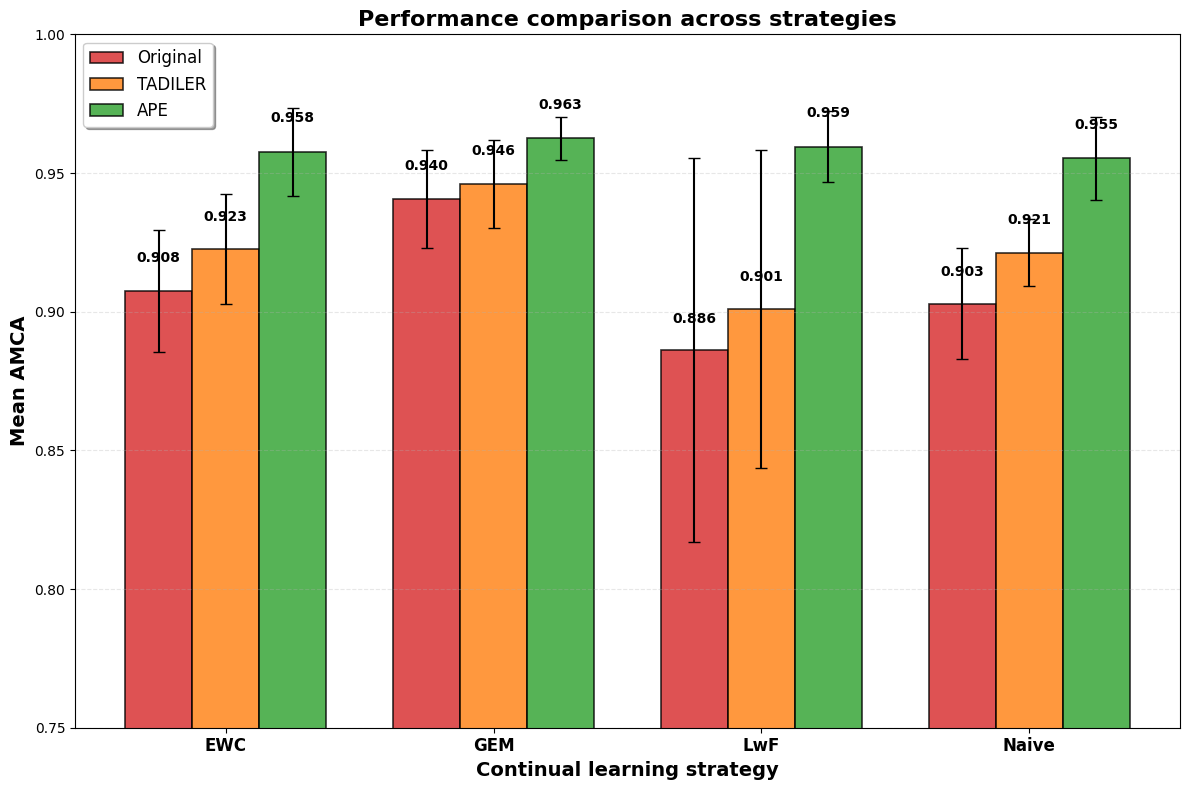


2. AMCA vs forgetting trade-off:
AMCA vs forgetting plot saved to amca_forgetting.pdf


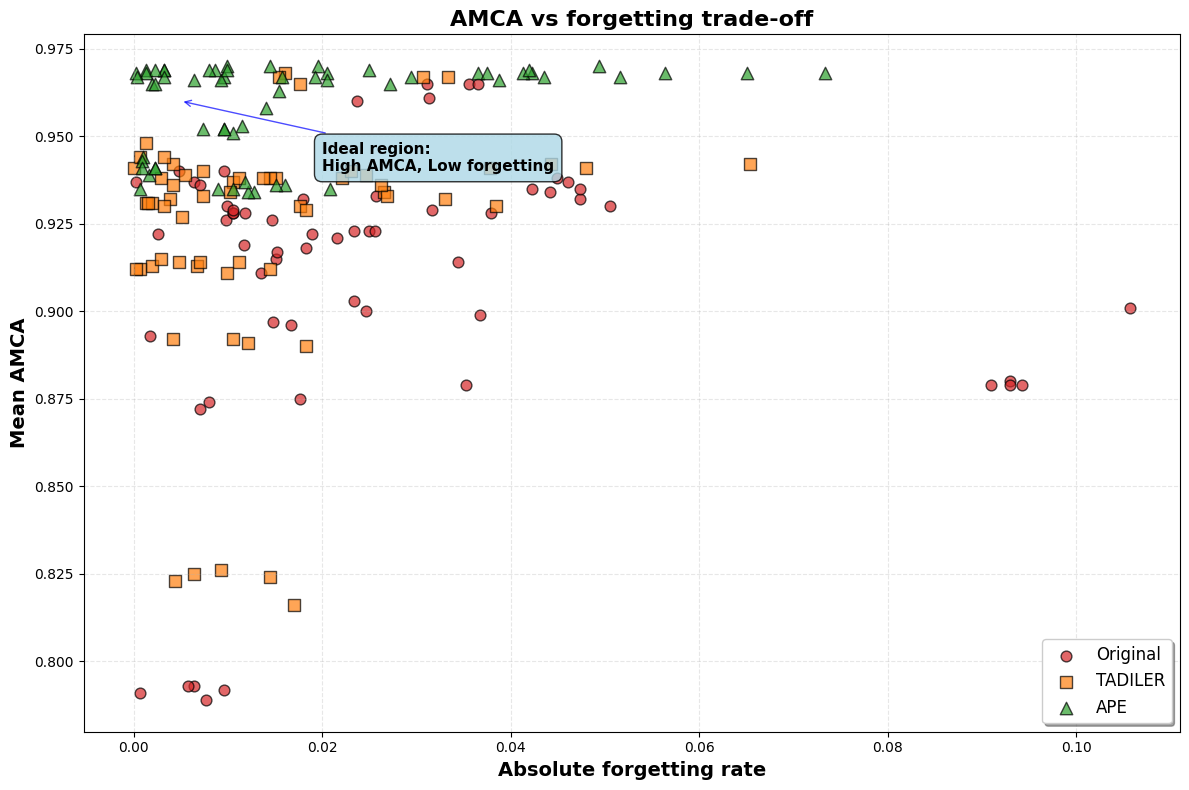


3. Performance evolution across KNN values:
Performance evolution plot saved to performance_evolution.pdf


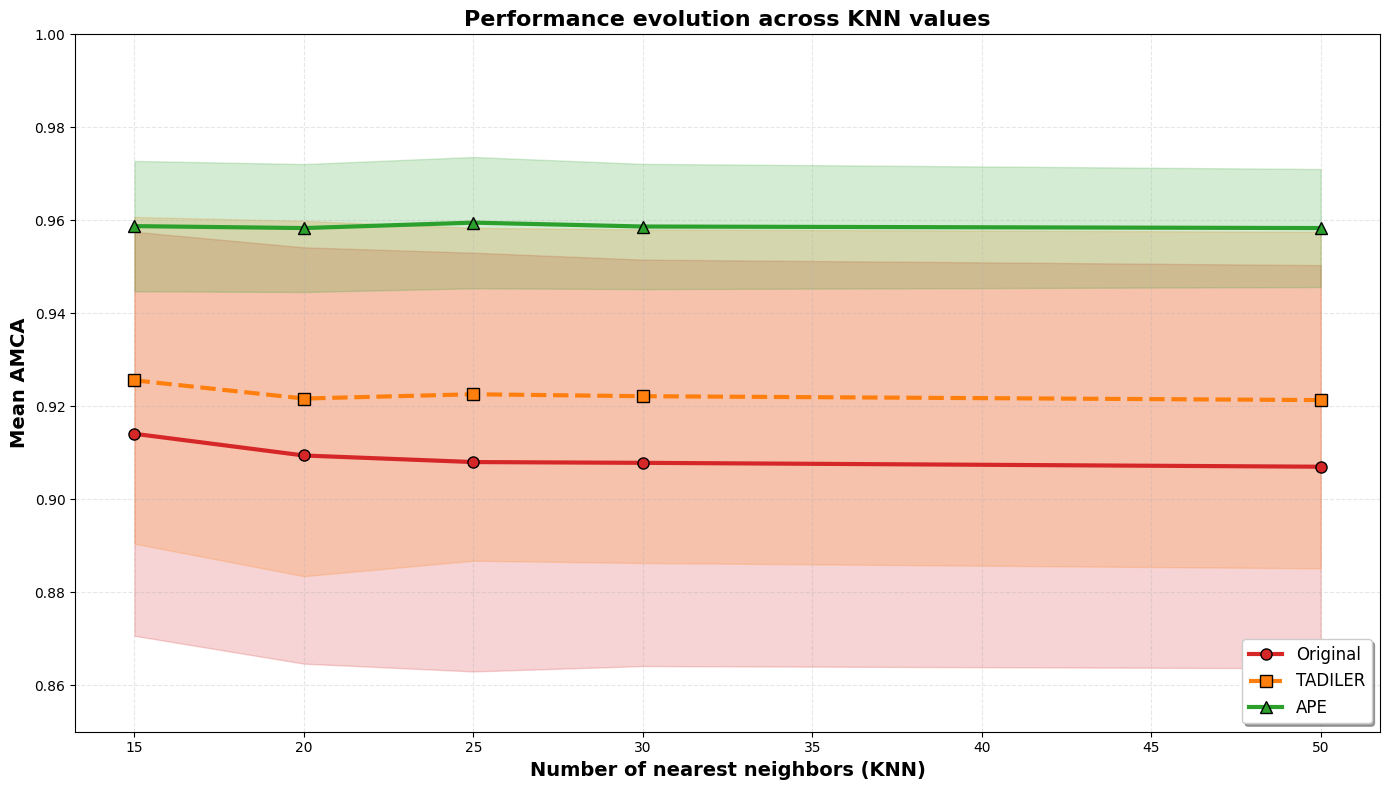

Radar plot saved to radar_overall.pdf


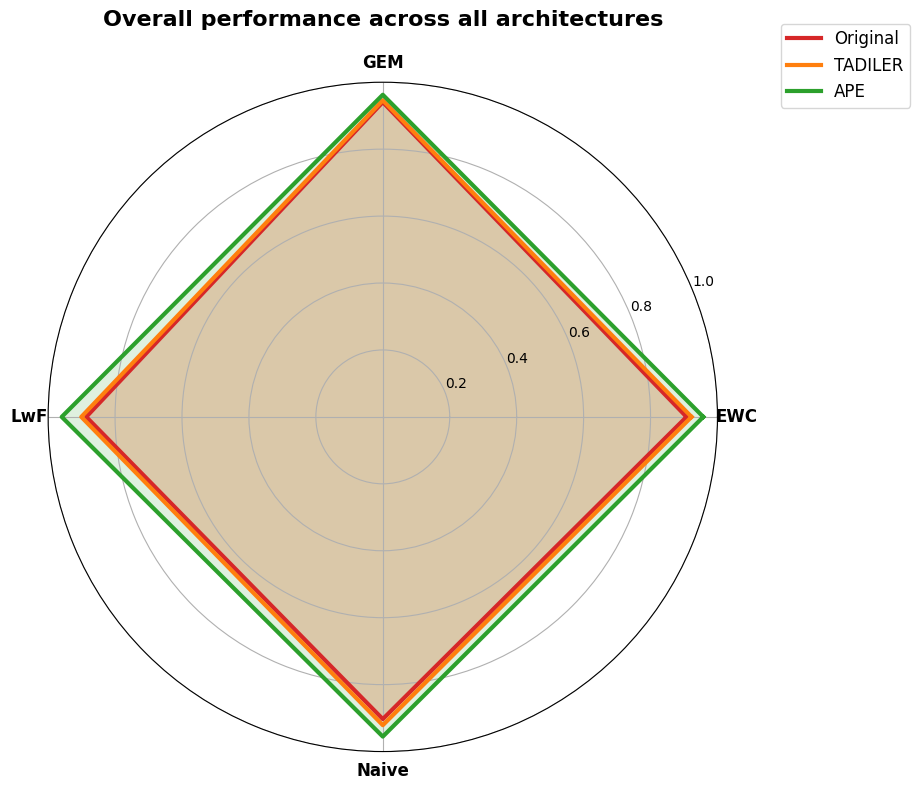

In [89]:
create_journal_plots()

## Latex  table

In [68]:
import pandas as pd
import numpy as np

def generate_latex_table(df: pd.DataFrame, save_path: str = None) -> str:
    """Generate LaTeX tables comparing Original, TADILER, and APE methods"""
    
    # Prepare data
    df['Method_Type'] = df['Method'].apply(lambda x: 
        'APE' if '-APE' in x 
        else 'TADILER' if '-TADILER' in x 
        else 'Original'
    )
    
    architectures = ['Attention', 'Residual', 'MLP']
    knn_values = [15, 20, 25, 30, 50]
    
    # Split strategies into two groups
    strategy_groups = [
        (['Naive', 'GEM'], 'naive_gem'),
        (['LwF', 'EWC'], 'lwf_ewc')
    ]
    
    all_tables = []
    
    for group_idx, (strategies, group_name) in enumerate(strategy_groups):
        latex_lines = []
        
        # Table header
        table_num = group_idx + 1
        strategy_names = " and ".join(strategies)
        
        latex_lines.extend([
            f"\\begin{{table*}}",
            "\\scriptsize",
            f"  {{\\caption{{Comparison of Mean AMCA scores and forgetting (parentheses) for {strategy_names} strategies across different base models. Boldface",
            "indicates superior performance among \\textit{Original}, \\textit{TADILER}, and \\textit{APE} methods based on Mean AMCA. Averages are",
            "computed across different NN values for each base model.}",
            f"  \\label{{tab:amca_comparison_{group_name}}}",
            "}",
            "  {\\begin{tabular}{llcccccc}",
            "  ",
            "  \\toprule"
        ])
        
        # Dynamic header based on strategies
        strategy_headers = []
        cmidrule_parts = []
        method_headers = []
        
        col_start = 3
        for i, strategy in enumerate(strategies):
            strategy_headers.append(f"\\multicolumn{{3}}{{c}}{{\\bfseries {strategy}}}")
            cmidrule_parts.append(f"\\cmidrule(lr){{{col_start}-{col_start+2}}}")
            method_headers.extend([f"\\bfseries Original", f"\\bfseries TADILER", f"\\bfseries APE"])
            col_start += 3
        
        latex_lines.extend([
            f"  \\bfseries Model & \\bfseries NN & {' & '.join(strategy_headers)} \\\\",
            f"  {' '.join(cmidrule_parts)}",
            f" &  \\bfseries  & {' & '.join(method_headers)} \\\\",
            "  \\midrule"
        ])
        
        def format_value_with_forgetting(amca, forgetting):
            """Format AMCA value with forgetting in parentheses"""
            return f"{amca:.3f}({abs(forgetting):.1f})"
        
        def get_method_data(subset_df, method_type):
            """Get AMCA and forgetting for a specific method type"""
            method_data = subset_df[subset_df['Method_Type'] == method_type]
            if method_data.empty:
                return None, None
            amca = method_data['Mean AMCA'].iloc[0]
            forgetting = method_data['Forgetting (0-10)'].iloc[0]
            return amca, forgetting
        
        def bold_max_values(values_list, method_names=['Original', 'TADILER', 'APE']):
            """Bold the maximum AMCA value, with tie-breaking rules"""
            if not values_list or all(v is None for v in values_list):
                return values_list
            
            # Extract AMCA and forgetting values for comparison
            amca_values = []
            forgetting_values = []
            
            for val in values_list:
                if val is None:
                    amca_values.append(-1)  # Very low value for missing data
                    forgetting_values.append(999)  # Very high forgetting for missing data
                else:
                    # Parse "AMCA(forgetting)" format
                    parts = val.split('(')
                    amca_val = float(parts[0])
                    forgetting_val = float(parts[1].rstrip(')'))
                    amca_values.append(amca_val)
                    forgetting_values.append(forgetting_val)
            
            # Find maximum AMCA
            max_amca = max(amca_values)
            
            # Find all indices with maximum AMCA
            max_amca_indices = [i for i, val in enumerate(amca_values) if val == max_amca]
            
            # If only one maximum, bold it
            if len(max_amca_indices) == 1:
                best_idx = max_amca_indices[0]
            else:
                # Tie in AMCA - choose the one with lowest forgetting
                min_forgetting_among_max = min(forgetting_values[i] for i in max_amca_indices)
                forgetting_tie_indices = [i for i in max_amca_indices 
                                        if forgetting_values[i] == min_forgetting_among_max]
                
                if len(forgetting_tie_indices) == 1:
                    best_idx = forgetting_tie_indices[0]
                else:
                    # Tie in both AMCA and forgetting - choose APE
                    ape_indices = [i for i in forgetting_tie_indices 
                                 if method_names[i] == 'APE']
                    if ape_indices:
                        best_idx = ape_indices[0]
                    else:
                        # APE not in tie, choose first one
                        best_idx = forgetting_tie_indices[0]
            
            # Apply bold formatting to the best value
            result = []
            for i, val in enumerate(values_list):
                if val is None:
                    result.append("--")
                elif i == best_idx:
                    result.append(f"\\textbf{{{val}}}")
                else:
                    result.append(val)
            
            return result
        
        # Process each architecture
        for arch_idx, architecture in enumerate(architectures):
            arch_df = df[df['Architecture'] == architecture]
            
            # Add multirow for architecture
            first_row_prefix = f"\\multirow{{7}}{{*}}{{\\textbf{{{architecture}}}}}"
            
            # Process each KNN value
            for knn_idx, knn in enumerate(knn_values):
                knn_df = arch_df[arch_df['KNN'] == knn]
                
                if knn_idx == 0:
                    line = f"{first_row_prefix} & {knn} "
                else:
                    line = f" & {knn} "
                
                # Process each strategy in this group
                for strategy in strategies:
                    strategy_df = knn_df[knn_df['Strategy'] == strategy]
                    
                    # Get data for each method
                    orig_amca, orig_forg = get_method_data(strategy_df, 'Original')
                    tadiler_amca, tadiler_forg = get_method_data(strategy_df, 'TADILER')
                    ape_amca, ape_forg = get_method_data(strategy_df, 'APE')
                    
                    # Format values
                    orig_val = format_value_with_forgetting(orig_amca, orig_forg) if orig_amca is not None else None
                    tadiler_val = format_value_with_forgetting(tadiler_amca, tadiler_forg) if tadiler_amca is not None else None
                    ape_val = format_value_with_forgetting(ape_amca, ape_forg) if ape_amca is not None else None
                    
                    # Bold the maximum values
                    bold_vals = bold_max_values([orig_val, tadiler_val, ape_val])
                    
                    line += f"& {bold_vals[0]} & {bold_vals[1]} & {bold_vals[2]} "
                
                line += "\\\\"
                latex_lines.append(line)
            
            # Add average row
            latex_lines.append(f"  \\cmidrule(lr){{2-{2 + len(strategies) * 3}}}")
            avg_line = " & \\textbf{Avg} "
            
            for strategy in strategies:
                strategy_df = arch_df[arch_df['Strategy'] == strategy]
                
                # Calculate averages for each method
                orig_avg_amca = strategy_df[strategy_df['Method_Type'] == 'Original']['Mean AMCA'].mean()
                orig_avg_forg = strategy_df[strategy_df['Method_Type'] == 'Original']['Forgetting (0-10)'].mean()
                
                tadiler_avg_amca = strategy_df[strategy_df['Method_Type'] == 'TADILER']['Mean AMCA'].mean()
                tadiler_avg_forg = strategy_df[strategy_df['Method_Type'] == 'TADILER']['Forgetting (0-10)'].mean()
                
                ape_avg_amca = strategy_df[strategy_df['Method_Type'] == 'APE']['Mean AMCA'].mean()
                ape_avg_forg = strategy_df[strategy_df['Method_Type'] == 'APE']['Forgetting (0-10)'].mean()
                
                # Format average values
                orig_avg = format_value_with_forgetting(orig_avg_amca, orig_avg_forg) if not np.isnan(orig_avg_amca) else None
                tadiler_avg = format_value_with_forgetting(tadiler_avg_amca, tadiler_avg_forg) if not np.isnan(tadiler_avg_amca) else None
                ape_avg = format_value_with_forgetting(ape_avg_amca, ape_avg_forg) if not np.isnan(ape_avg_amca) else None
                
                # Bold the maximum average values
                bold_avgs = bold_max_values([orig_avg, tadiler_avg, ape_avg])
                
                avg_line += f"& {bold_avgs[0]} & {bold_avgs[1]} & {bold_avgs[2]} "
            
            avg_line += "\\\\"
            latex_lines.append(avg_line)
            
            # Add midrule between architectures (except for the last one)
            if arch_idx < len(architectures) - 1:
                latex_lines.append("  \\midrule")
        
        # Table footer
        latex_lines.extend([
            "  \\midrule",
            "  \\bottomrule",
            "  \\end{tabular}}",
            "\\end{table*}",
            ""  # Empty line between tables
        ])
        
        all_tables.append('\n'.join(latex_lines))
    
    # Combine both tables
    final_latex = '\n'.join(all_tables)
    
    # Save to file if path provided
    if save_path:
        with open(save_path, 'w') as f:
            f.write(final_latex)
        print(f"LaTeX tables saved to {save_path}")
    
    return final_latex

def generate_separate_tables(df: pd.DataFrame, save_path_1: str = None, save_path_2: str = None):
    """Generate two separate LaTeX files for each table"""
    
    # Generate both tables
    full_latex = generate_latex_table(df)
    
    # Split into two tables
    tables = full_latex.split('\\end{table*}\n\n\\begin{table*}')
    
    if len(tables) == 2:
        table1 = tables[0] + '\\end{table*}'
        table2 = '\\begin{table*}' + tables[1]
        
        if save_path_1:
            with open(save_path_1, 'w') as f:
                f.write(table1)
            print(f"Table 1 (Naive & GEM) saved to {save_path_1}")
        
        if save_path_2:
            with open(save_path_2, 'w') as f:
                f.write(table2)
            print(f"Table 2 (LwF & EWC) saved to {save_path_2}")
        
        return table1, table2
    
    return full_latex, ""

def print_latex_table(df: pd.DataFrame):
    """Print both LaTeX tables to console"""
    latex_tables = generate_latex_table(df)
    print(latex_tables)

# Example usage
def example_usage():
    """Example of how to use the LaTeX table generator"""
    
    # Load data
    df = pd.read_csv('comparison.csv')
    
    # Generate and print both LaTeX tables
    print("Generating LaTeX tables...")
    print_latex_table(df)
    
    # Save both tables to one file
    generate_latex_table(df, save_path='comparison_tables.tex')
    
    # Save tables to separate files
    generate_separate_tables(df, 
                            save_path_1='table_naive_gem.tex',
                            save_path_2='table_lwf_ewc.tex')

# Load the data and generate table (uncomment to run)
# df = pd.read_csv('comparison.csv')
# print_latex_table(df)

In [69]:
df = pd.read_csv('comparison.csv')

# Print both tables to console
print_latex_table(df)

# Save both tables to one file
generate_latex_table(df, save_path='comparison_tables.tex')

# Save tables to separate files  
generate_separate_tables(df, 
                        save_path_1='table_naive_gem.tex',
                        save_path_2='table_lwf_ewc.tex')

\begin{table*}
\scriptsize
  {\caption{Comparison of Mean AMCA scores and forgetting (parentheses) for Naive and GEM strategies across different base models. Boldface
indicates superior performance among \textit{Original}, \textit{TADILER}, and \textit{APE} methods based on Mean AMCA. Averages are
computed across different NN values for each base model.}
  \label{tab:amca_comparison_naive_gem}
}
  {\begin{tabular}{llcccccc}
  
  \toprule
  \bfseries Model & \bfseries NN & \multicolumn{3}{c}{\bfseries Naive} & \multicolumn{3}{c}{\bfseries GEM} \\
  \cmidrule(lr){3-5} \cmidrule(lr){6-8}
 &  \bfseries  & \bfseries Original & \bfseries TADILER & \bfseries APE & \bfseries Original & \bfseries TADILER & \bfseries APE \\
  \midrule
\multirow{7}{*}{\textbf{Attention}} & 15 & 0.929(3.4) & 0.936(3.7) & \textbf{0.967(3.5)} & 0.965(3.4) & 0.967(3.5) & \textbf{0.968(1.3)} \\
 & 20 & 0.926(4.3) & 0.938(4.2) & \textbf{0.963(4.2)} & 0.965(3.2) & \textbf{0.968(4.2)} & 0.967(2.4) \\
 & 25 & 0.922(4.9) &

('\\begin{table*}\n\\scriptsize\n  {\\caption{Comparison of Mean AMCA scores and forgetting (parentheses) for Naive and GEM strategies across different base models. Boldface\nindicates superior performance among \\textit{Original}, \\textit{TADILER}, and \\textit{APE} methods based on Mean AMCA. Averages are\ncomputed across different NN values for each base model.}\n  \\label{tab:amca_comparison_naive_gem}\n}\n  {\\begin{tabular}{llcccccc}\n  \n  \\toprule\n  \\bfseries Model & \\bfseries NN & \\multicolumn{3}{c}{\\bfseries Naive} & \\multicolumn{3}{c}{\\bfseries GEM} \\\\\n  \\cmidrule(lr){3-5} \\cmidrule(lr){6-8}\n &  \\bfseries  & \\bfseries Original & \\bfseries TADILER & \\bfseries APE & \\bfseries Original & \\bfseries TADILER & \\bfseries APE \\\\\n  \\midrule\n\\multirow{7}{*}{\\textbf{Attention}} & 15 & 0.929(3.4) & 0.936(3.7) & \\textbf{0.967(3.5)} & 0.965(3.4) & 0.967(3.5) & \\textbf{0.968(1.3)} \\\\\n & 20 & 0.926(4.3) & 0.938(4.2) & \\textbf{0.963(4.2)} & 0.965(3.2) & \\t